<a href="https://colab.research.google.com/github/Dishantkharkar/Dishantkharkar/blob/main/SVM_Model_HYPERPARAMTER_Networking_ads_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index
[1. Introduction](#1)

[2. Import basic Libararies and import Data File](#2)

[3. Basic checks on Dataset](#3)

[4. Drop the column](#4)

[5. Exploratory data analysis](#5)
* [5.1. Univaraite Analysis](#5.1)
* [5.2. Bivariate Analysis](#5.2)
* [5.3. Multivariate Analysis](#5.3)

[6. Data Preprocessing Pipeline](#6)

[7. Check for Outliers](#7)

[8. Scaling Data](#8)

[9. Converting Categorical data into numerical data](#9)

[10. Feature Selection](#10)

[11. splitting Dataset](#11)

[12. Support Vector Classifier Model](#12)

[13. Cross Validation](#13)

[14. Hyperparameter Tunning](#14)

[15. Conclusion](#15)






# 1. Introduction

The dataset contains details of the purchase of a product based on social network advertisements based on gender, age, and estimated salary.

Target class belongs to two discrete categories of purchased and not purchased.

In this notebook, the prediction is made whether a person will buy a product displayed on a social network advertisement using  SVM and Kernal SVM. Also, Hyperparameter tuning is done for SVM for choosing a set of optimal hyperparameters for SVM.



# 2. Importing basic Libararies and import Data file

In [1]:
from ast import increment_lineno
# to perform mathematical operation 
import pandas as pd

# for array
import numpy as np

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import data file
data=pd.read_csv("Social_Network_Ads.csv")

# 3. Basic Checks on Dataset

In [3]:
# getting first five rows of data
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# getting last 5 rows
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
# shape
data.shape

(400, 5)

In [6]:
# data types
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Insights from Info

*   total entries is 400
*   No missing values in dataset



In [8]:
# fetch numerical columns
num_col=data.select_dtypes(include=["int64"]).columns
num_col

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
# fetch categorical columns
cat_col=data.select_dtypes(include=['object']).columns
cat_col

Index(['Gender'], dtype='object')

In [10]:
for i in cat_col:
  print(data[i].unique())
  print(data[i].value_counts())

['Male' 'Female']
Female    204
Male      196
Name: Gender, dtype: int64


In [11]:
# satatiscal report 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


# 4. Drop The Column

* The User ID column has no significance in determining the target, so it can be dropped.



In [12]:
data.drop('User ID', axis = 1, inplace=True)

# 5. Exploratory data analysis


In [13]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## 5.1. Univariate Analysis

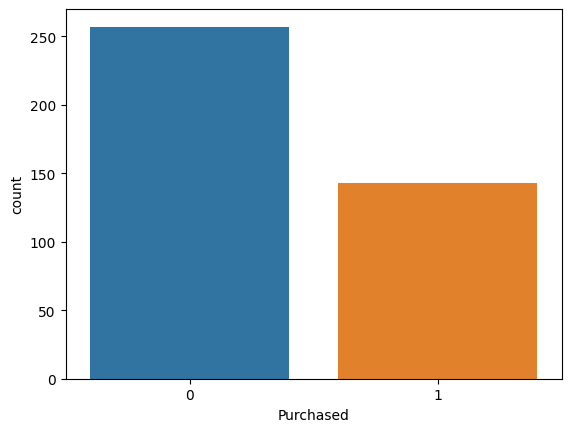

In [14]:
sns.countplot(data=data,x='Purchased')
plt.show()

### Insights
* From above visualization it is clear that number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.

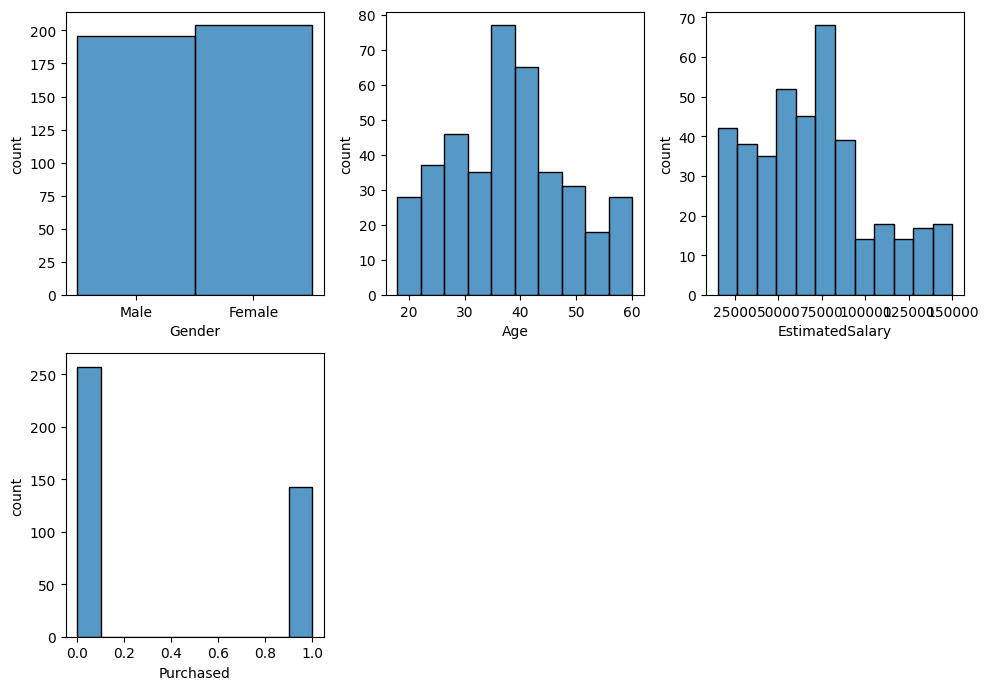

In [15]:
# check the distribution of input variable
plt.figure(figsize=(10,10))
plotnumber=1
for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column)
    plt.ylabel('count')
  plotnumber+=1
plt.tight_layout()

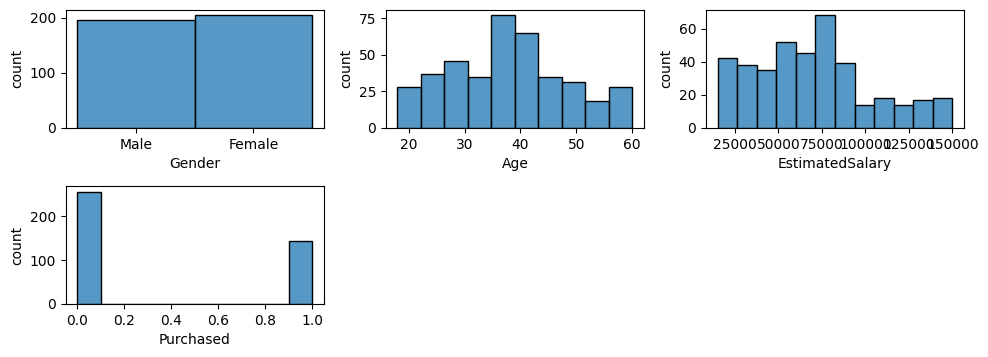

In [16]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

## 5.2. Bivariate Analysis

In [17]:
# create dataframe which includes categorical data
data1=data['Gender']

In [18]:
# Create dataframe which incldes numerical columns
data2=data[['Age','EstimatedSalary','Purchased']]

<Figure size 1000x300 with 0 Axes>

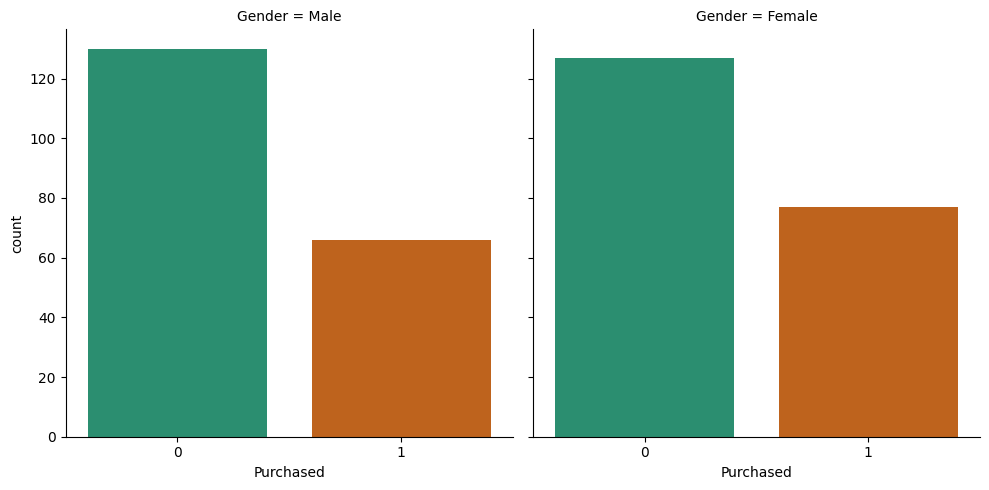

In [19]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=data,palette="Dark2");
plt.show()

### Insights
from above graph it shows that number of female purchased is more than male

<Axes: xlabel='Age', ylabel='Count'>

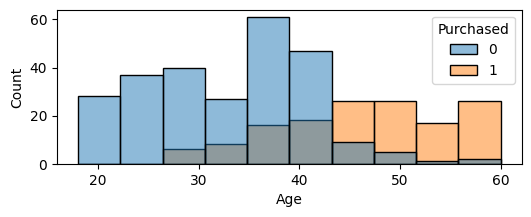

In [20]:
# analysis age with purchased
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Age',hue='Purchased')

### Insights
* From above graph it shows that Lower age group is not influence with ads on networking sites
* but Higher age group is more influence through networking ads.


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

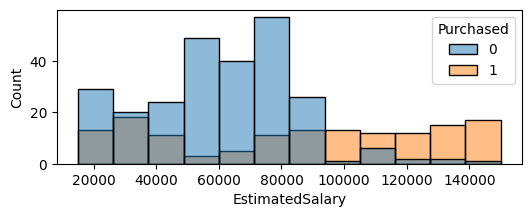

In [21]:
# analysis age with purchased
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='EstimatedSalary',hue='Purchased')

### Insights
From above visualization it shows that Higher the salary higher chances of influence from the advertisemnet.

## 5.3. Multivariate Analysis

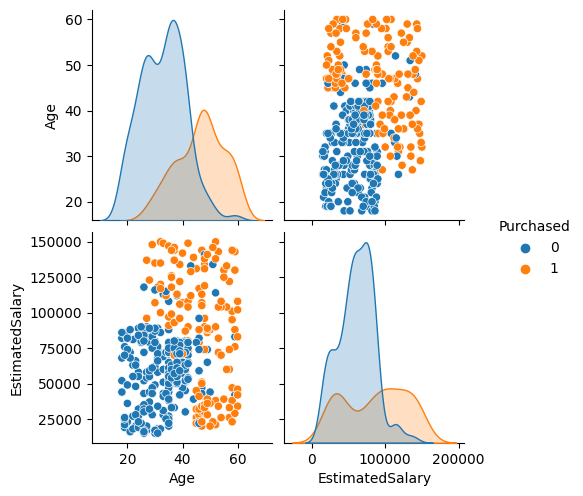

In [22]:
sns.pairplot(data,hue='Purchased')

# 6. Data Preprocessing Pipeline

In [23]:
# checking missing values
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
# check for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

# 7. Check for Outliers
Skip .... Beacause SVM ignors ouyliers

# 8. Scaling Data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['EstimatedSalary','Age']]=scale.fit_transform(data[['EstimatedSalary','Age']])

In [26]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


# 9. Converting Categorical data into numerical data



## Get Dummies

In [27]:
data1=data.copy()

In [28]:
data1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


In [29]:
data1 = pd.get_dummies(data, columns = ['Gender'], drop_first=True)

In [30]:
data1.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,0.023810,0.029630,0,1
1,0.404762,0.037037,0,1
2,0.190476,0.207407,0,0
3,0.214286,0.311111,0,0
4,0.023810,0.451852,0,1


# 10. Feature Selection

In [31]:
# Checking Co relation
corr_data=data1[['Age','EstimatedSalary']]

<Axes: >

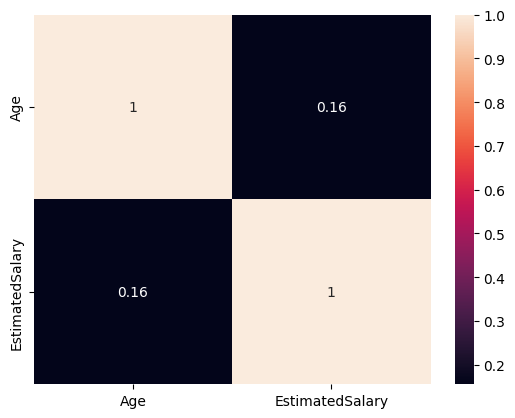

In [32]:
sns.heatmap(corr_data.corr(),annot=True)

# 11. Splitting Dataset

In [33]:
x = data1.drop(['Purchased'],axis = 1)
y = data1['Purchased']

In [34]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=3)

In [35]:
## balancing the data
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Insights
It is balance Data

# 12. Support Vector Classifier Model

In [36]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_train,y_train)

SVC()

In [37]:
# Predict output for X_test

y_pred=svclassifier.predict(x_test)

In [38]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.9

In [39]:
f1_score(y_test,y_pred)

0.8604651162790699

In [40]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        78
           1       0.84      0.88      0.86        42

    accuracy                           0.90       120
   macro avg       0.89      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



In [41]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_pred)
f1

0.8604651162790699

# 13. Cross Validation

In [42]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Standard deviation :",scores.std()) 

[0.88888889 0.88636364 0.83185841]
Cross validation Score: 0.8690369774440571
Standard deviation : 0.026309425381222537


* Standard deviation < 0.05 is good, then Model is good otherwise bad model.
* Hence 0.0005 is less than 0.05, Model Is Good

# 14. Hyperparameter Tunning

In [43]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV
# define hyperparameter range
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,20))}
model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring="f1",cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [44]:
print(grid.best_params_)

{'C': 60, 'gamma': 1, 'random_state': 1}


In [45]:
model=SVC(C=60,gamma=1,random_state=1)

In [46]:
model.fit(x_test,y_test)

SVC(C=60, gamma=1, random_state=1)

In [47]:
y_pred=model.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.925

In [49]:
f1_score(y_test,y_pred)

0.888888888888889

# 15. Conculsion

* Overall Accuracy is 92% and Precision, Recall and F1-score for predicting not purchased category is above 87% and for purchased category is close to 90%